In [1]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/content/train.csv')

train_data.head(20)

,text
0,Forest fire near La Ronge Sask. Canada
1,All residents asked to 'shelter in place' are ...
2,"13,000 people receive #wildfires evacuation or..."
3,Just got sent this photo from Ruby #Alaska as ...
4,#RockyFire Update => California Hwy. 20 closed...
5,#flood #disaster Heavy rain causes flash flood...
6,I'm on top of the hill and I can see a fire in...
7,There's an emergency evacuation happening now ...
8,I'm afraid that the tornado is coming to our a...
9,Three people died from the heat wave so far


In [2]:
import nltk
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [5]:
#reformer les phrases avec les mots restants
def Preprocess_listofSentence(listofSentence):
 preprocess_list = []
 for sentence in listofSentence :
  sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

  sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

  tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

  words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

  words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

  sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

  preprocess_list.append(sentence_clean)

 return preprocess_list

In [6]:
import nltk
nltk.download('omw-1.4')
preprocess_list = Preprocess_listofSentence(train_data['text'])
#Ensuite on peut afficher un exemple de phrase nettoyée
print('Phrase de base : '+train_data['text'][5])
print('Phrase nettoyée : '+preprocess_list[5])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Phrase de base : #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
Phrase nettoyée : flood disaster heavy rain cause flash flooding street colorado spring area


In [7]:
#Les machines ne peuvent pas comprendre les caractères et les mots. Ainsi, 
#lorsqu'il s'agit de données textuelles, nous devons les représenter en nombres pour qu'elles soient comprises 
#par la machine.
#Countvectorizer est une méthode pour convertir du texte en données numériques.
#Puis on utilise la fonction fit_transform() sur nos données preprocessées.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(preprocess_list)
X.toarray()[0]
#En fait la classe vectorizer garde beaucoup d’autres informations sur le dictionnaire.
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aal',
 'aba',
 'abandon',
 'abandoned',
 'ability',
 'abject',
 'ablaze',
 'able',
 'aboard',
 'abomination',
 'abortion',
 'abouts',
 'absence',
 'absolute',
 'absolutely',
 'abstract',
 'absurd',
 'absurdly',
 'abuse',
 'accept',
 'access',
 'accident',
 'accidentally',
 'accidently',
 'accidents',
 'according',
 'accordingly',
 'account',
 'accountable',
 'accuracy',
 'accused',
 'accustomed',
 'ace',
 'achieve',
 'achievement',
 'aching',
 'acid',
 'acids',
 'acne',
 'acoustic',
 'acquiesce',
 'acquire',
 'acquired',
 'acquisition',
 'acre',
 'acronym',
 'across',
 'acrylic',
 'act',
 'actin',
 'acting',
 'action',
 'activate',
 'active',
 'actively',
 'activist',
 'activity',
 'actor',
 'actress',
 'actual',
 'actually',
 'acute',
 'ad',
 'adaptation',
 'add',
 'added',
 'addict',
 'addiction',
 'addition',
 'address',
 'adjust',
 'adjustable',
 'adjuster',
 'administration',
 'administrative',
 'admit',
 'adopt',
 'adoption',
 'adoptive',
 'adorable',
 'adult',
 'advance

In [14]:
# il faut que nos données soient sous forme de tokens (chaque mot séparé) et non sous forme de phrases.
tokenize_sentences = []

for i in range(len(preprocess_list)):
 tokenize_sentences.append(nltk.tokenize.word_tokenize(preprocess_list[i]))
 print (tokenize_sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[['forest', 'fire', 'near', 'la', 'canada'], ['resident', 'shelter', 'place', 'notified', 'officer', 'evacuation', 'shelter', 'place', 'order'], ['people', 'receive', 'wildfire', 'evacuation', 'order'], ['got', 'sent', 'photo', 'ruby', 'smoke', 'wildfire', 'school'], ['update', 'closed', 'direction', 'due', 'lake', 'county', 'fire', 'wildfire'], ['flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'flooding', 'street', 'colorado', 'spring', 'area'], ['top', 'hill', 'see', 'fire', 'wood'], ['there', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street'], ['afraid', 'tornado', 'coming', 'area'], ['three', 'people', 'heat', 'wave', 'far'], ['south', 'getting', 'flooded', 'hah', 'wait', 'second', 'live', 'south', 'gon', 'na', 'gon', 'na', 'flooding'], ['flooding', 'day', 'lost', 'count'], ['flood', 'bago', 'bago'], ['damage', 'school', 'bus', 'car', 'crash', 'breaking'], ['whats', 'man'], ['love', 'fruit'], ['summer', 'lovely'], ['car', 'fast'], [], ['ridiculous'], ['c

In [9]:
#Premièrement on initialise le Word2Vec, puis on l’entraîne sur nos données !
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model_W2V = Word2Vec(sentences=tokenize_sentences, size=100, window=5, min_count=1, workers=4)
model_W2V.train(tokenize_sentences, total_examples=len(tokenize_sentences), epochs=50)

(2479200, 2527700)

In [16]:
#Visualisation
#On peut par exemple regarder quel mot se rapproche de ‘fire’ grâce à la fonction similar_by_word().
#Les cinq premiers sont ‘decomposition’, ‘township’, ‘racer’, ‘beast’ et ‘apartment’.
tokenize_sentences[0][1]
print(tokenize_sentences[0][1])
model_W2V.similar_by_word(tokenize_sentences[0][1])[:5]

fire


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


[('manzanita', 0.7281564474105835),
 ('alarm', 0.7113684415817261),
 ('timber', 0.6971951127052307),
 ('warden', 0.6691259145736694),
 ('acre', 0.6688856482505798)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


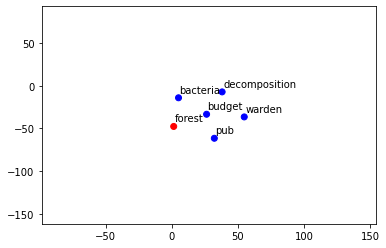

Word most similar to : forest
['warden', 'pub', 'bacteria', 'budget', 'decomposition']


In [11]:
#Pour mieux visualiser cette similarité on peut utiliser la fonction suivante 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def display_closestwords_tsnescatterplot_perso(model, word):
 arr = np.empty((0,100), dtype='f')
 word_labels = [word]

 numb_sim_words = 5

 # get close words
 close_words = model.similar_by_word(word)[:numb_sim_words]

 # add the vector for each of the closest words to the array
 arr = np.append(arr, np.array([model[word]]), axis=0)
 for wrd_score in close_words:
  wrd_vector = model[wrd_score[0]]
  word_labels.append(wrd_score[0])
  arr = np.append(arr, np.array([wrd_vector]), axis=0)

 # find tsne coords for 2 dimensions
 tsne = TSNE(n_components=2, random_state=0)
 np.set_printoptions(suppress=True)
 Y = tsne.fit_transform(arr)

 x_coords = Y[:, 0]
 y_coords = Y[:, 1]

 # color for words
 color = ['red']
 for i in range(numb_sim_words):
  color.append('blue')

 # display scatter plot
 plt.scatter(x_coords, y_coords, c = color)

 for label, x, y in zip(word_labels, x_coords, y_coords):
  plt.annotate(label, xy=(x, y), xytext=(1, 5), textcoords='offset points')
 plt.xlim(min(x_coords)-100, max(x_coords)+100)
 plt.ylim(min(y_coords)-100, max(y_coords)+100)
 plt.show()

 print("Word most similar to : "+word)
 print([sim_word[0] for sim_word in close_words])
 #Et ensuite l’utiliser en précisant le modèle d’Embedding et le mot à analyser
display_closestwords_tsnescatterplot_perso(model_W2V, tokenize_sentences[0][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


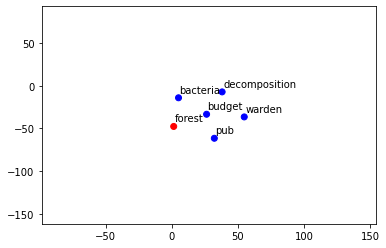

Word most similar to : forest
['warden', 'pub', 'bacteria', 'budget', 'decomposition']


In [15]:
#Et ensuite l’utiliser en précisant le modèle d’Embedding et le mot à analyser
display_closestwords_tsnescatterplot_perso(model_W2V, tokenize_sentences[0][0])